# Part I - ( Ford Go Bike)
## by (Johnson Uduakobong)

## Introduction
>ford-goBike-dataset-exploration is a project doing exploratory visualization on the bike trip dataset. This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in 2017. The dataset can be downloaded from https://www.fordgobike.com/system-data.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Load Dataset
bike_df = pd.read_csv('fordgobike-tripdata.csv')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
bike_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
bike_df.duplicated().sum()

0

### Problems
> wrong type with columns like , start_time , end_time ,member_birth_year wrong type with all this columns.

### Cleaning

In [7]:
#make a copy of the dataset
df = bike_df.copy()

In [8]:
# Define: Change columns dtype based on it's value

# Code
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        
        'start_station_id': 'object',
        'end_station_id': 'object',
        
        'start_station_latitude': 'object',
        'start_station_longitude':  'object',
        'end_station_latitude':  'object',
        'end_station_longitude':  'object',
        
        'bike_id': 'object',
        'user_type': 'category'}

df = df.astype(dtype)

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null object
start_station_longitude    183412 non-null object
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null object
end_station_longitude      183412 non-null object
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(11

In [9]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.7896,-122.401,13,Commercial St at Montgomery St,37.7942,-122.403,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.7915,-122.391,81,Berry St at 4th St,37.7759,-122.393,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.7693,-122.427,3,Powell St BART Station (Market St at 4th St),37.7864,-122.405,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.7748,-122.447,70,Central Ave at Fell St,37.7733,-122.444,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.8046,-122.272,222,10th Ave at E 15th St,37.7927,-122.249,4898,Subscriber,1974.0,Male,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null object
start_station_longitude    183412 non-null object
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null object
end_station_longitude      183412 non-null object
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(11

In [11]:
df.describe()

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


In [12]:
df.shape

(183412, 16)

### What is the structure of your dataset?

> There are 183412 rows for Ford GoBike System in a bike-sharing system wich covering the greater San Francisco Bay area, with 16 features, including 'start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip', 'start_date','start_hourofday', 'start_dayofweek', 'start_month', 'end_date','end_hourofday', 'end_dayofweek', 'end_month', 'duration_minute'

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this dataset is `duration_sec`, `start_time`, and `user_type column`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> time related columns.

### Exploratory Data Analysis

In [13]:
#Check column names
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [14]:
df.describe()

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


In [15]:
df.groupby('user_type').describe()

duration_sec                                                        \
                  count         mean          std   min    25%    50%     75%   
user_type                                                                       
Customer        19868.0  1432.465019  3861.314330  62.0  504.0  792.0  1263.0   
Subscriber     163544.0   640.263678  1315.976912  61.0  312.0  490.0   750.0   

                    member_birth_year                                          \
                max             count         mean        std     min     25%   
user_type                                                                       
Customer    83772.0           16631.0  1985.361073   9.478858  1878.0  1981.0   
Subscriber  85444.0          158516.0  1984.748246  10.179569  1900.0  1980.0   

                                    
               50%     75%     max  
user_type                           
Customer    1987.0  1992.0  2001.0  
Subscriber  1987.0  1992.0  2001.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bc119cf98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2bb90d0e48>]], dtype=object)

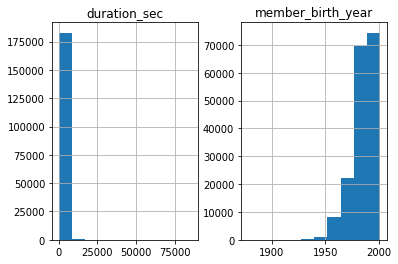

In [16]:
df.hist()

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [17]:
#There is ony two type of user

df.user_type.unique()

[Customer, Subscriber]
Categories (2, object): [Customer, Subscriber]

### Number of bicycle service users

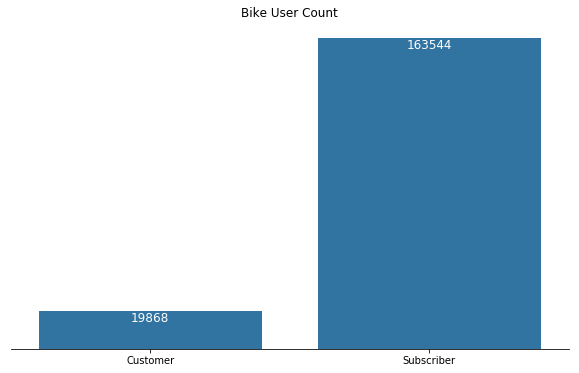

In [18]:
# Show number of user using countplot

plt.figure(figsize=(10,6))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data= df, x ='user_type', color=base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, va='top', ha='center', color = 'w', fontsize=12)

plt.title('Bike User Count')

# Remove unnecessary features 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Show the plot
plt.show();

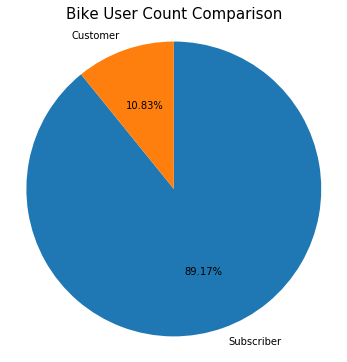

In [19]:
# Show user type by it's percentage

plt.figure(figsize=(10,6))
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=15);

> From the total entry of 183,412 row in February 2019 data, where more than three-quarter users are Subscribers

### How many bikes in dataset and what is the most ones use ?

In [20]:
len(df['bike_id'].unique())

4646

Text(0.5,1,'count of bikes')

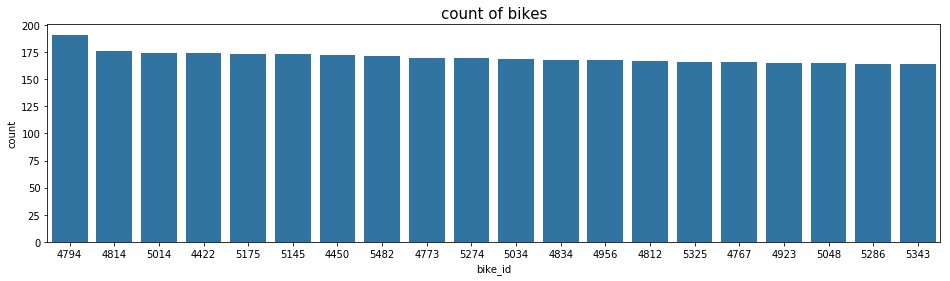

In [21]:
#Create Countplot showing most used Bicycle
base_color = sns.color_palette()[0]
plt.figure(figsize=(16,4))
bikes = df['bike_id'].value_counts()[:20].index
sns.countplot(data=df, x='bike_id', color=base_color, order =bikes)
plt.title("count of bikes", fontsize=15)

- there's 4646 bike in the data set the most one is used id bike with id 4794

### Average trip durations

In [22]:
# Overall trip duration average

df.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

> Overall trip duration average is 704.278338 seconds or is about 12 minutes. Probably the outliers is due to users who forgot.

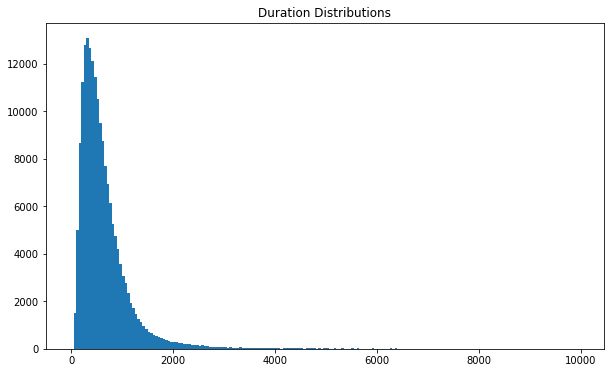

In [23]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)

plt.hist(df.duration_sec, bins=bins)
plt.title('Duration Distributions');

> This distribution of duration is right skewed.

### Datetime exploration

In [24]:
# Make new columns for analysis (month, start_day, end_day, and hour)

df['start_day'] = df['start_time'].dt.day_name()
df['hour'] = df['start_time'].dt.hour

df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.7896,-122.401,13,Commercial St at Montgomery St,37.7942,-122.403,4902,Customer,1984.0,Male,No,Thursday,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.7915,-122.391,81,Berry St at 4th St,37.7759,-122.393,2535,Customer,NaN,NaN,No,Thursday,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.7693,-122.427,3,Powell St BART Station (Market St at 4th St),37.7864,-122.405,5905,Customer,1972.0,Male,No,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.7748,-122.447,70,Central Ave at Fell St,37.7733,-122.444,6638,Subscriber,1989.0,Other,No,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.8046,-122.272,222,10th Ave at E 15th St,37.7927,-122.249,4898,Subscriber,1974.0,Male,Yes,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.7704,-122.391,323,Broadway at Kearny,37.798,-122.406,5200,Subscriber,1959.0,Male,No,Thursday,23
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.3173,-121.885,312,San Jose Diridon Station,37.3297,-121.902,3803,Subscriber,1983.0,Female,No,Thursday,23
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,37.7954,-122.405,127,Valencia St at 21st St,37.7567,-122.421,6329,Subscriber,1989.0,Male,No,Thursday,23
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,37.7954,-122.405,127,Valencia St at 21st St,37.7567,-122.421,6548,Subscriber,1988.0,Other,No,Thursday,23
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,37.789,-122.403,121,Mission Playground,37.7592,-122.421,6488,Subscriber,1992.0,Male,No,Thursday,23


#### Based on weekday

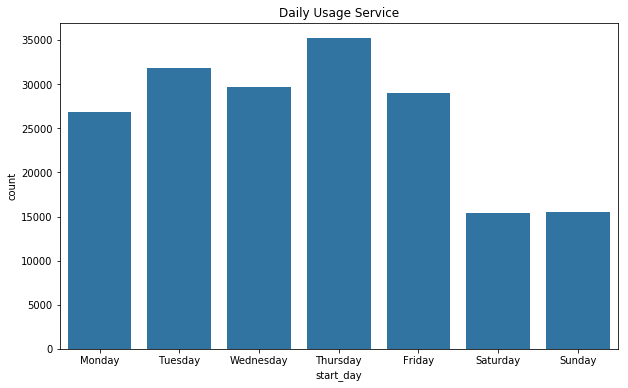

In [25]:
# Countplot bike usage based on weekday

day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(10,6))
plt.title('Daily Usage Service')
sns.countplot(data=df, x='start_day', order=day_name, color=base_color);

> This service is more widely used on weekdays than weekends. Because the majority of users are subscribers who are actively cycling on weekdays.

On weekdays, the use of bike-sharing services is more than on weekends. We well see in the bivariate section, is this result is depend on user type or not.

#### Based on hour

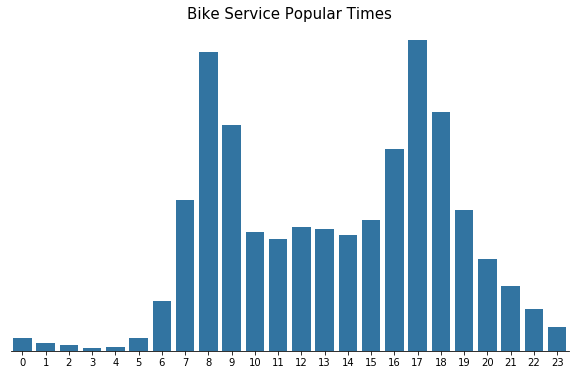

In [26]:
# Create a countplot showing Bike servie based on hour
hour_order = np.arange(0,24)

plt.figure(figsize=(10,6))
plt.title('Bike Service Popular Times', fontsize=15)
ax = sns.countplot(data=df, x='hour', order=hour_order, color=base_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('');

> Based on the plotting above, the use of bicycle services is the most during peak hours.

This plot can be a recommendation for tourist who want to use the Ford GoBike service if they happen to visit San Francisco Bay and want trip around using it.

Based on datetime analysis above maybe we can get some insight in bivariate or multivariate analysis.

### Stations Analysis
station name or id, location, start vs end, distance

In [27]:
df.start_station_name.nunique()

329

> Based on this data, there are 329 stations across San Francisco Bay area.

In [28]:
df.start_station_name.unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'The Embarcadero at Steuart St', 'Market St at Dolores St',
       'Grove St at Masonic Ave', 'Frank H Ogawa Plaza',
       '4th St at Mission Bay Blvd S', 'Palm St at Willow St',
       'Washington St at Kearny St', 'Post St at Kearny St',
       'Jones St at Post St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       'Valencia St at 21st St', 'Channing Way at Shattuck Ave',
       'Bancroft Way at College Ave', 'Howard St at Mary St',
       '22nd St at Dolores St', 'Laguna St at Hayes St',
       '5th St at Folsom', 'Telegraph Ave at 23rd St',
       'Page St at Scott St', 'Lake Merritt BART Station',
       'West St at 40th St', 'The Embarcadero at Sansome St',
       'Folsom St at 9th St', 'University Ave at Oxford St',
       'MLK Jr Way at University Ave', 'The Embarcadero at Bryant St',
       '17th St at Valencia St', 'Valencia St at 16th St',
       'Valencia St at 22nd St', 'Fran

### Ten most used stations

##### Start station

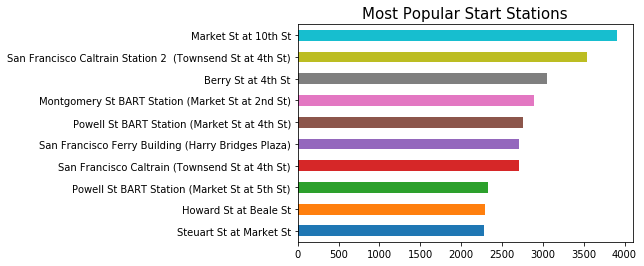

In [29]:
plt.title('Most Popular Start Stations', fontsize=15)
df.start_station_name.value_counts(ascending=True).tail(10).plot.barh();

> There are 329 start station , the most used one is Market St at 10th St

##### End station

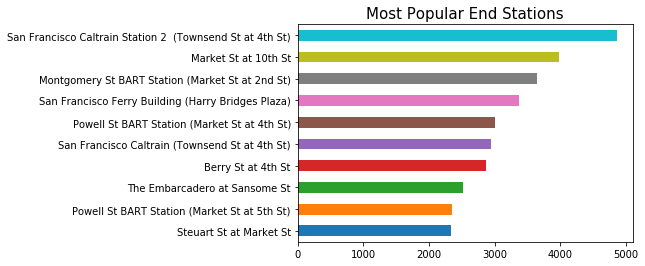

In [30]:
plt.title('Most Popular End Stations', fontsize=15)
df.end_station_name.value_counts(ascending=True).tail(10).plot.barh();

> There are 329 end station , the most used one is San Francisco Caltrain Station 2

#### Most Popular Station
For each start and end station, we choose ten most popular station. Then from the both, we only choose those that fall into the second category, those stations are:

In [31]:
# Make new variable for start and end stations 
pop_start = df.start_station_name.value_counts(ascending=True).tail(10)
pop_end = df.end_station_name.value_counts(ascending=True).tail(10)

# Check wheter the station is popular in both start and end 
for s in pop_start.index:
    if s in pop_end:
        print(s)

Steuart St at Market St
Powell St BART Station (Market St at 5th St)
San Francisco Caltrain (Townsend St at 4th St)
San Francisco Ferry Building (Harry Bridges Plaza)
Powell St BART Station (Market St at 4th St)
Montgomery St BART Station (Market St at 2nd St)
Berry St at 4th St
San Francisco Caltrain Station 2  (Townsend St at 4th St)
Market St at 10th St


### Ten rarely used stations
#### Start station

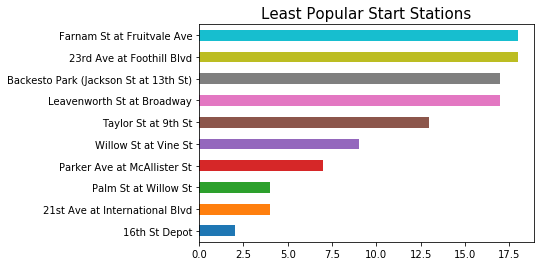

In [32]:
plt.title('Least Popular Start Stations', fontsize=15)
df.start_station_name.value_counts(ascending=True).head(10).plot.barh();

#### End station

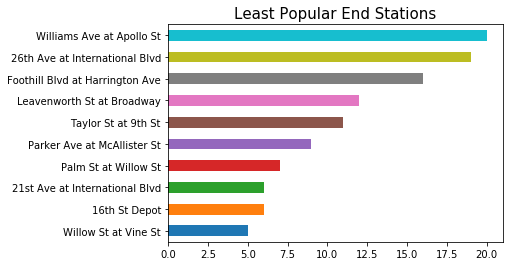

In [33]:
plt.title('Least Popular End Stations', fontsize=15)
df.end_station_name.value_counts(ascending=True).head(10).plot.barh();

#### Least Popular Station
For each start and end station, we choose ten least popular station. Then from the both, we only choose those that fall into the two category, those stations are:

In [34]:
# Make new variable for start and end stations 
least_start = df.start_station_name.value_counts(ascending=True).head(10)
least_end = df.end_station_name.value_counts(ascending=True).head(10).tail(10)

# Check wheter the station is least popular in both start and end 
for s in least_start.index:
    if s in least_end:
        print(s)

16th St Depot
21st Ave at International Blvd
Palm St at Willow St
Parker Ave at McAllister St
Willow St at Vine St
Taylor St at 9th St
Leavenworth St at Broadway


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, there were some problem to this Ford GoBike of February 2019 data, such as:

- Quality issues for many columns, which is the dtype is not suitable with it's data
- We had to add some column to extend our time- based analysis!

### Observations
- there are 4607 bike in the data set the most one is used id bike with id 4794

- there are 329 start station , the most used one is Market St at 10th St

- there are 329 end station , the most used one is Caltrain Station 2  (Townsend St at 4th St)

- Most of the users of are subscribers

- The most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm

- Tuesdays and Wednesdays are the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers , saturday and sunday are not popular as the rest of days.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Riding duration based on user type

In [35]:
# Make filter based on user type

cust = df['user_type']=='Customer'
subs = df['user_type']=='Subscriber'

In [36]:
df['duration_minute'] = (df['duration_sec']/60).astype(int)

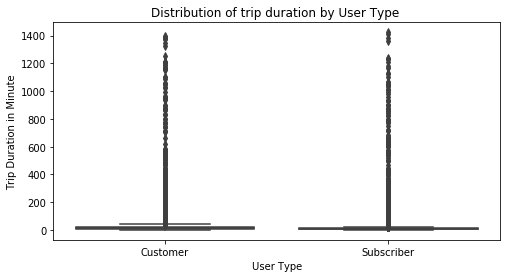

In [37]:
plt.figure(figsize=(8,4))
plt.title("Distribution of trip duration by User Type ")
sns.boxplot(data=df, x='user_type', y='duration_minute');
plt.xlabel('User Type')
plt.ylabel('Trip Duration in Minute')
plt.show()

In [38]:
# Average trip duration for Customer/Casual

df[cust].duration_sec.mean()

1432.4650191262331

In [39]:
# Average trip duration for Subscriber/Member

df[subs].duration_sec.mean()

640.26367827618253

> It seems that duration average for Customer is higher than Subscriber

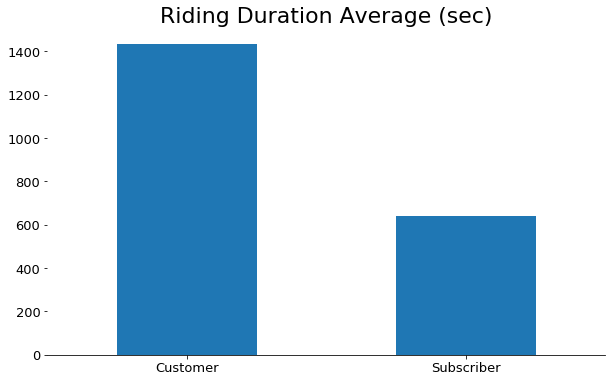

In [40]:
# Plotting trip duration comparison

df_duration_user = df[['user_type', 'duration_sec']].groupby('user_type').mean()

ax = df_duration_user.plot(kind='bar', figsize=(10,6), color=base_color, fontsize=13);

locs, labels = plt.xticks()

# # loop through each pair of locations and labels
# for loc, label in zip(locs, labels):

#     # get the text property for the label to get the correct count
#     count = cat_counts[label.get_text()]
#     pct_string = '{}'.format(count)

#     # print the annotation just below the top of the bar
#     plt.text(loc, count-8, pct_string, va='top', ha='center', color = 'w')

ax.set_title("Riding Duration Average (sec)", fontsize=22)
ax.set_ylabel("second(s)", fontsize=15)
plt.xticks(rotation=0)

# Remove unnecessary features 
ax.get_legend().remove() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Show the plot
plt.show();

#### Does the above depend on if a user is a subscriber or customer?

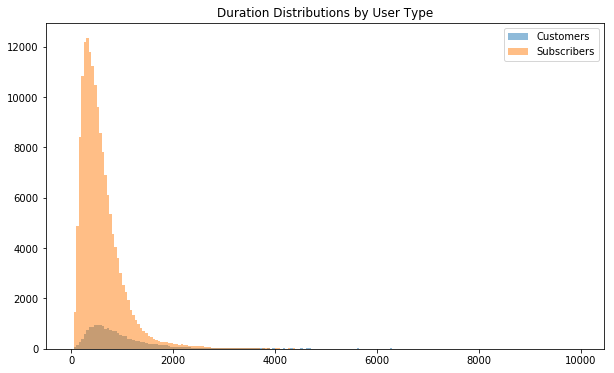

In [41]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)

plt.hist(df[cust].duration_sec, bins, alpha=0.5, label='Customers')
plt.hist(df[subs].duration_sec, bins, alpha=0.5, label='Subscribers')
plt.legend(loc='upper right')
plt.title('Duration Distributions by User Type')

plt.show()

> In this histogram it can be seen that customers have a more varied duration than subscribers. The duration of use for subscribers is more narrowed to one point.

### Datetime analysis
#### Per Weekday usage

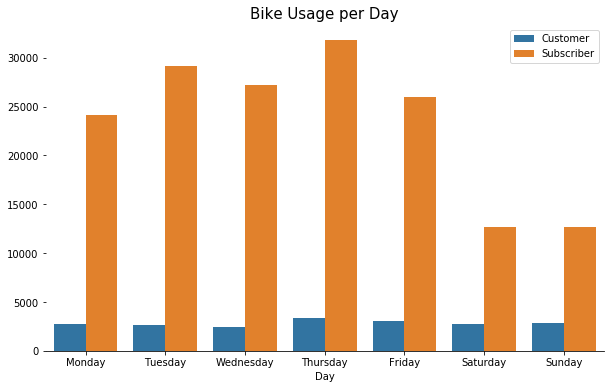

In [42]:
plt.figure(figsize=(10,6))
plt.title('Bike Usage per Day', fontsize=15)
chart = sns.countplot(data=df, x='start_day', order=day_name, hue='user_type')
chart.set(xlabel='Day', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

> The use of this service for Subscribers is high on weekdays and decreases on weekends.
In contrast to Subscribers, Customers have increased on weekends, starting from Friday and decreasing on Sundays. It is possible that the newcomers will return to their respective places that day, because Monday they have started their activities again.

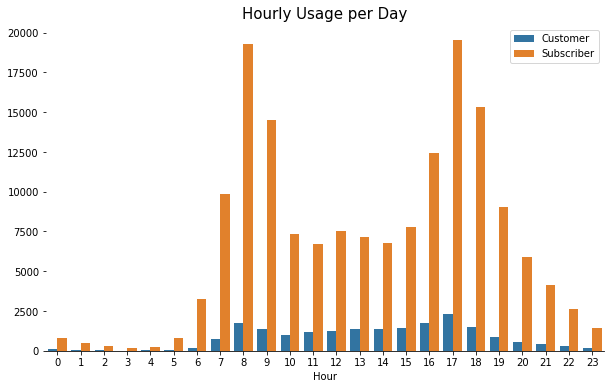

In [43]:
plt.figure(figsize=(10,6))
plt.title('Hourly Usage per Day', fontsize=15)
chart = sns.countplot(data=df, x='hour', hue='user_type')

chart.set(xlabel='Hour', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

- Most Subscribers use the service at peak hour.
- In contrast, Customers has more flexible time, mostly at noon until afternoon.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - There is some kind of correlation between duration and user type, Subscribers tends to have shorter usage times than Customers.
- Trip duration is longer during weekends, reflecting more casual and entertainment usage.
 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - Most Subscribers use the service at peak hour.
- In contrast, Customers if have more flexible time, mostly at noon until afternoon.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

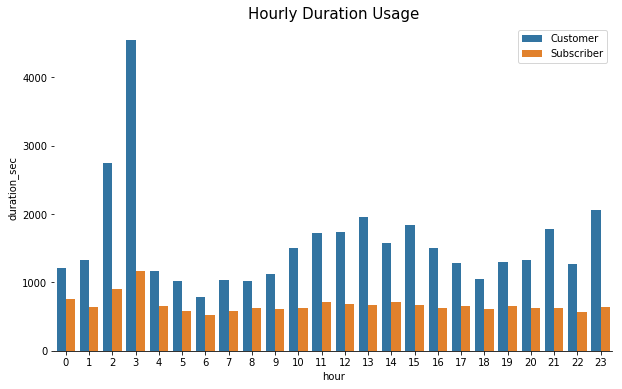

In [44]:
plt.figure(figsize=(10,6))
plt.title('Hourly Duration Usage', fontsize=15)
sns.barplot(data=df, x='hour', y='duration_sec', ci=None, hue='user_type')

chart.set(xlabel='Hour', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

> Customers have consistently longer trips across all hours of the day. However, customer trips are much longer at midnight and midday

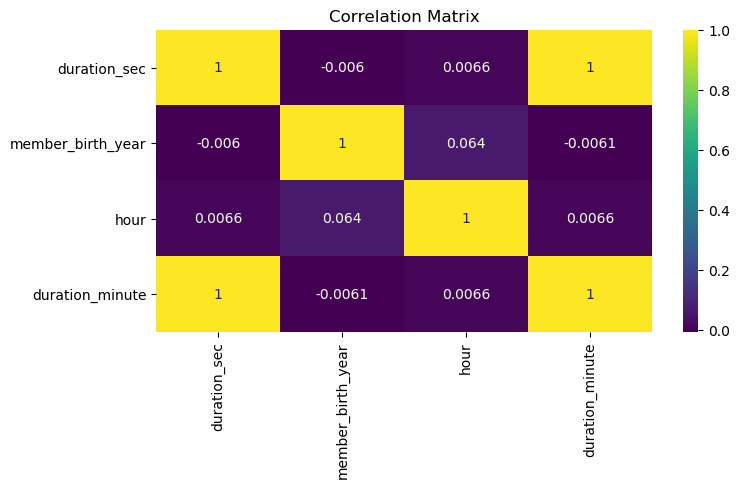

In [45]:
plt.figure(figsize = (8,4), dpi = 100)
sns.heatmap(df.corr(), cmap = "viridis", annot = True)
plt.title("Correlation Matrix")
plt.xticks(rotation = 90)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes. The type of user has an influence on the use of this service. There are quite a lot of differences here and there, such as:

- Duration of use
 > Subscribers tends to have stable duration usage than Customers

- Days of use
 > Subscribers tends to use the service in weekdays, in contrast Customers have more flexible time.

- Hours of use
 > Subscribers is have very intense usage at peak hour, Customers have more flexible time.

### Were there any interesting or surprising interactions between features?

> It's kind of surprise that average duration at 3.00 AM is most high than in other hour.

## Conclusions
>- Customers have consistently longer trips across all days specially in sunday and saturday , Subscriber have the duration throw all the week
- Customers have consistently longer trips across all hours of the day. However, customer trips are much longer at midnight and midday
- There are 329 start stations and end stations , the most used start station is Market St at 10th St and the most used end station is San Francisco Caltrain Station 2 while 23rd Ave at Foothill Blvd and Farnam St at Fruitvale Ave are the least used ones.



In [46]:
# Export cleaned dataframe to CSV file for slide deck

# Code
df.to_csv('df.csv', index=None)
df_check = pd.read_csv('df.csv')

# Test
df_check

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,hour,duration_minute
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,869
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18,708
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,1030
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,608
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,26
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thursday,23,29
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,Thursday,23,19
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,Thursday,23,26
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,Thursday,23,26
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,Thursday,23,17
